In [32]:
import pandas as pd

# Load the dataset into a DataFrame
dataset_path = "imdb_dataset.csv" 
df = pd.read_csv(dataset_path)

In [33]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [34]:
# Explore the structure and contents of the DataFrame
print(df.info())    # Basic information about the DataFrame
print(df.head())    # Display the first few rows of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [35]:
# Data Cleaning
# Handle missing values
df.dropna(subset=['review'], inplace=True)

# Remove duplicates
df.drop_duplicates(subset=['review'], inplace=True)

In [36]:
# Display information after data cleaning
print(df.info())

# Save the cleaned DataFrame to a new CSV file
cleaned_data_path = "imdb_dataset1.csv"
df.to_csv(cleaned_data_path, index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
None


In [37]:
#stage2
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Load the cleaned DataFrame
cleaned_data_path = "imdb_dataset1.csv"
df = pd.read_csv(cleaned_data_path)

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stopwords_set = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords_set]
    
    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply the preprocessing function to the 'review' column
df['preprocessed_review'] = df['review'].apply(preprocess_text)

# Display the preprocessed data
print(df['preprocessed_review'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    one reviewer mentioned watching 1 oz episode y...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: preprocessed_review, dtype: object


In [38]:
#stage3
import nltk
nltk.download('punkt')

# Tokenize the preprocessed reviews
df['tokenized_review'] = df['preprocessed_review'].apply(nltk.word_tokenize)

# Display the tokenized data
print(df['tokenized_review'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [one, reviewer, mentioned, watching, 1, oz, ep...
1    [wonderful, little, production, br, br, filmin...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, there, family, little, boy, jake, ...
4    [petter, matteis, love, time, money, visually,...
Name: tokenized_review, dtype: object


In [39]:
#stage4
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Join the tokenized words to form strings
df['tokenized_review'] = df['tokenized_review'].apply(' '.join)

# Fit and transform the tokenized reviews using TF-IDF vectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['tokenized_review'])

# Display the type and shape of the TF-IDF matrix
print(type(X_tfidf))  
print(X_tfidf.shape)


<class 'scipy.sparse._csr.csr_matrix'>
(49582, 169245)


In [40]:
#stage 5
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
X = X_tfidf  # The TF-IDF matrix
y = df['sentiment']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier (Multinomial Naive Bayes for text classification)
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8670969043057376
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.87      0.87      4939
    positive       0.87      0.86      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



In [41]:
#stage6


# Predict a review sentiment
new_review = "This movie was really amazing!"
preprocessed_new_review = preprocess_text(new_review)
tokenized_new_review = nltk.word_tokenize(preprocessed_new_review)

# Transform the tokenized new review using the same TF-IDF vectorizer
new_review_tfidf = tfidf_vectorizer.transform([' '.join(tokenized_new_review)])

# Make a sentiment prediction
predicted_sentiment = naive_bayes_classifier.predict(new_review_tfidf)

# Print the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment[0])


Predicted Sentiment: positive


In [12]:
#stage 7


In [13]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


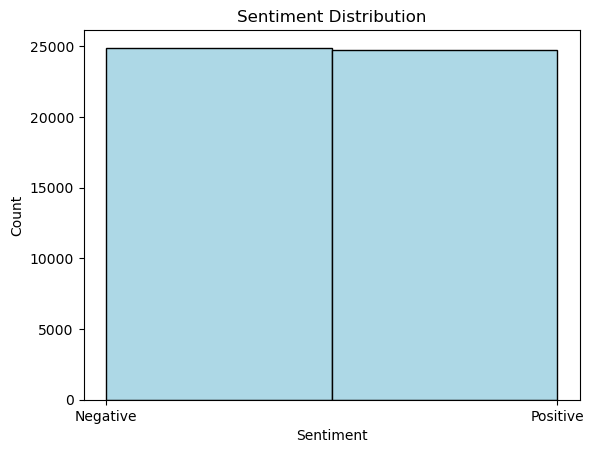

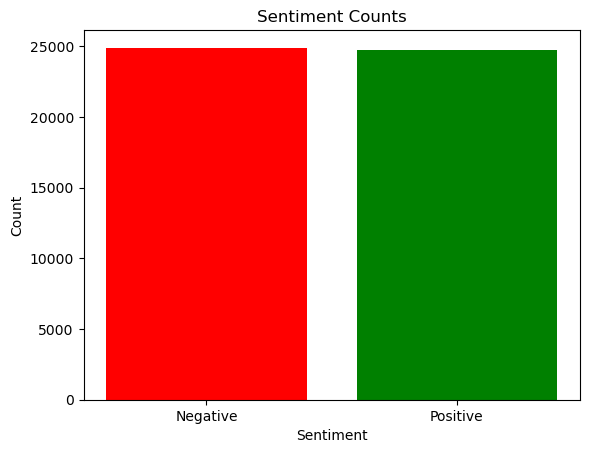

In [16]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels using a histogram
plt.hist(df['sentiment'], bins=2, color='lightblue', edgecolor='black')  # Use a single color
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Display the count of positive and negative reviews using a bar plot
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()




In [17]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


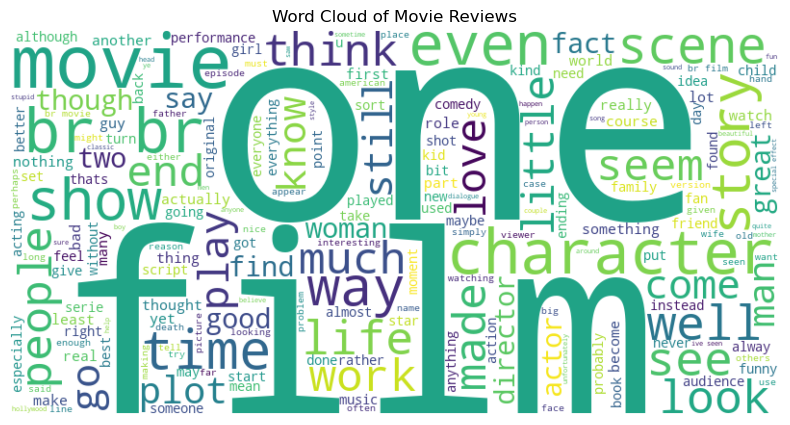

In [18]:
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(df['preprocessed_review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()


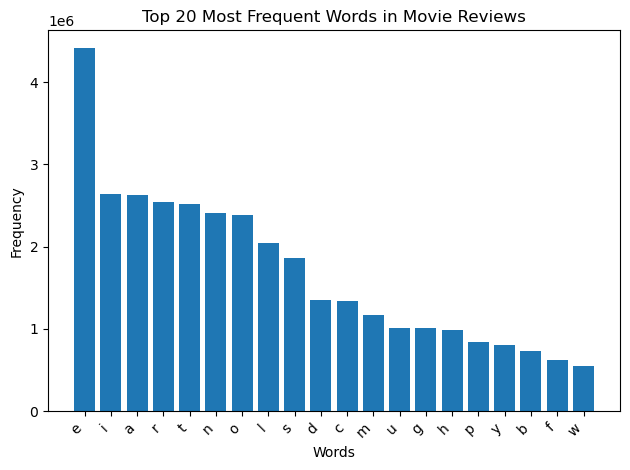

In [19]:
from collections import Counter

# Tokenize all reviews and flatten them into a single list of words
all_tokens = [token for tokens_list in df['tokenized_review'] for token in tokens_list.split()]

# Calculate the frequency of each word
word_freq = Counter(all_tokens)

# Get the top N most common words
top_n = 20
top_words = dict(word_freq.most_common(top_n))

# Plot the bar plot
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Words in Movie Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




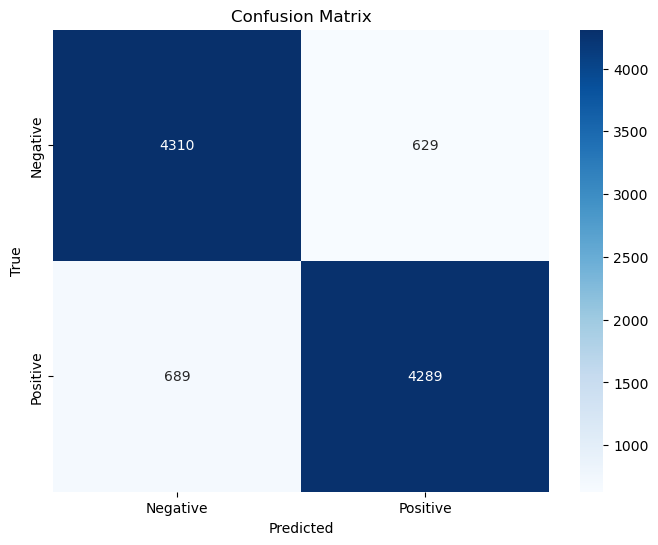

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


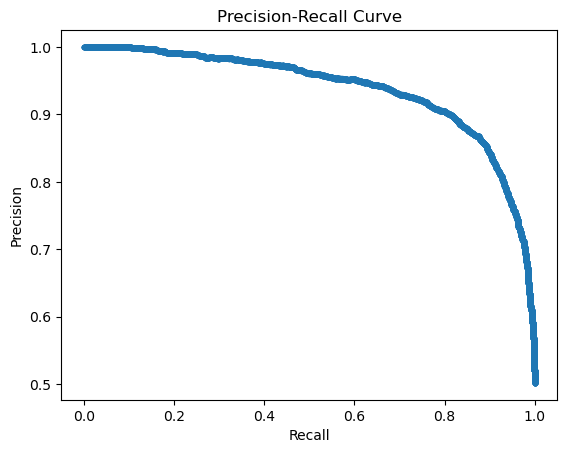

In [24]:
# Get the predicted probabilities for positive class
y_pred_prob = naive_bayes_classifier.predict_proba(X_test)[:, 1]

# Get the precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_prob)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


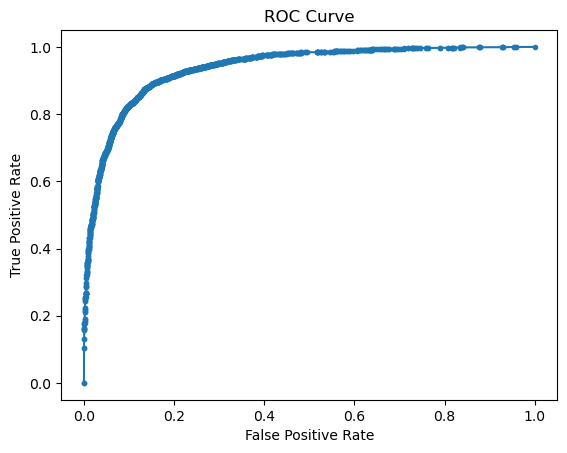

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to binary values
y_test_binary = label_encoder.fit_transform(y_test)

# Get the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob)  # Use y_pred_prob from previous step

# Plot the ROC curve
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



In [26]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [44]:

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['tokenized_review'])


new_review = input("Enter a movie review: ")
preprocessed_new_review = preprocess_text(new_review)  # Preprocess the new review
tokenized_new_review = nltk.word_tokenize(preprocessed_new_review)  # Tokenize the new review
joined_new_review = ' '.join(tokenized_new_review)  # Join the tokenized words

# Transform the preprocessed and joined new review using the same TF-IDF vectorizer
new_review_tfidf = tfidf_vectorizer.transform([joined_new_review])
predicted_sentiment = naive_bayes_classifier.predict(new_review_tfidf)

# Print the predicted sentiment
if predicted_sentiment[0] == 'positive':
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")



Enter a movie review: this movie is bad
Predicted Sentiment: Negative
